<a href="https://colab.research.google.com/github/AraiKensuke/LOST/blob/Upgrade_python3/Notebooks/SampleDataOverview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#########  clone and install necessary packages from github repositories

import sys
import importlib

if importlib.util.find_spec("pyPG") is None:
  !git clone https://github.com/AraiKensuke/pyPG.git
  %cd /content/pyPG/
   ###  pyPG is written in C++/python, and uses the C library GNU Scientific Library.  
  !sudo apt-get install libgsl-dev    
  !python setup.py build_ext --inplace


!git clone https://github.com/AraiKensuke/ka_tools.git




Cloning into 'pyPG'...
remote: Enumerating objects: 90, done.
remote: Total 90 (delta 0), reused 0 (delta 0), pack-reused 90
Unpacking objects: 100% (90/90), done.
/content/pyPG
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl23 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 1,926 kB of archives.
After this operation, 9,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgslcblas0 amd64 2.4+dfsg-6 [79.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl23 amd64 2.4+dfsg-6 [823 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl-dev amd64 2.4+dfsg-6 [1,023 kB]
Fetched 1,926 kB in 1s 

In [2]:
if True:#importlib.util.find_spec("LOST") is None:
  %cd /content
  !git clone https://github.com/AraiKensuke/LOST.git
  %cd /content/LOST

!python setup.py build_ext --inplace

sys.path.insert(1, "/content/LOST")    #  add these to searchpath for python modules
sys.path.insert(1, "/content/pyPG")    #  add these to searchpath for python modules
%cd ..


#from google.colab import files
#uploaded = files.upload()

/content
Cloning into 'LOST'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 461 (delta 144), reused 215 (delta 69), pack-reused 141
Receiving objects: 100% (461/461), 25.91 MiB | 29.12 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/LOST
running build_ext
cythoning kfARlibMPmv_ram2.pyx to kfARlibMPmv_ram2.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/LOST/kfARlibMPmv_ram2.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'kfARlibMPmv_ram2' extension
creating build
creating build/temp.linux-x86_64-3.6
/usr/bin/gcc -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist

In [3]:
import pickle
import LOST.kflib as _kfl

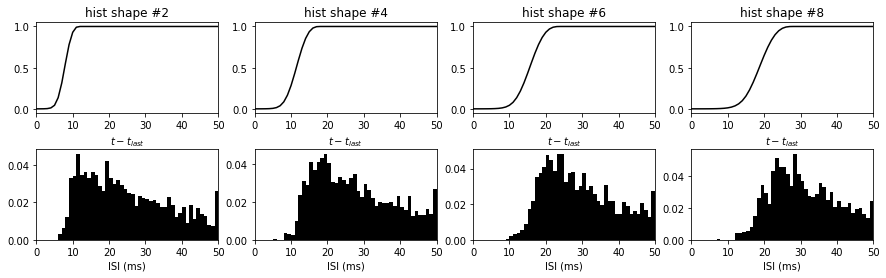

In [64]:
fig = _plt.figure(figsize=(15, 4))
ifig = 1
for hist_shape in range(2, 10, 2):
  with open("LOST/Notebooks/DATA/exmp%d1/generative.pkl" % hist_shape, "rb") as f:
    lm = pickle.load(f)
    isis = _kfl.ISIs(lm["spkdat"].T)
    fig.add_subplot(2, 4, ifig)
    _plt.title("hist shape #%d" % hist_shape)
    _plt.plot(lm["lambda2"], color="black")
    if hist_shape == 1:
      _plt.ylabel("post-spk hist")
    _plt.xlim(0, 50)
    _plt.xlabel('$t - t_{last}$')
    fig.add_subplot(2, 4, ifig+4)
    _plt.hist(isis, bins=_N.linspace(0, 50, 51), density=True, color="black")
    _plt.xlim(0, 50)
    if hist_shape == 1:
      _plt.ylabel("ISI density")
    ifig += 1
    _plt.xlabel("ISI (ms)")
    fig.subplots_adjust(hspace=0.4)

In [19]:
elm["spkdat"].shape

(2000, 40)

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([0.01886792, 0.03773585, 0.01886792, 0.01886792, 0.        ,
        0.01886792, 0.05660377, 0.03773585, 0.01886792, 0.        ,
        0.        , 0.01886792, 0.01886792, 0.0754717 , 0.05660377,
        0.03773585, 0.03773585, 0.        , 0.01886792, 0.03773585,
        0.03773585, 0.01886792, 0.        , 0.01886792, 0.01886792,
        0.05660377, 0.03773585, 0.03773585, 0.0754717 , 0.        ,
        0.03773585, 0

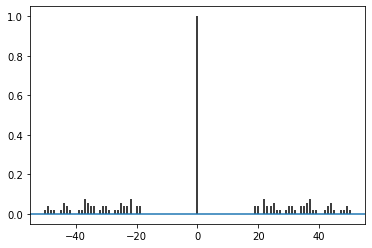

In [25]:
_plt.acorr(lm["spkdat"][:, 2], maxlags=50)

(0.0, 50.0)

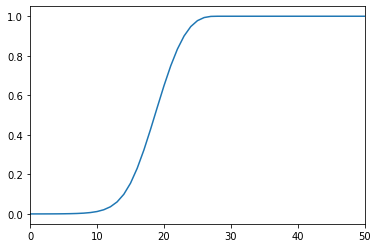

In [34]:
_plt.plot(lm["lambda2"])
_plt.xlim(0, 50)

In [30]:
import LOST.kflib as _kfl
import numpy as _N

In [35]:
isis = _kfl.ISIs(lm["spkdat"].T)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  7.,
         7.,  8.,  9., 13., 23., 41., 54., 46., 35., 68., 81., 72., 72.,
        65., 53., 85., 65., 58., 50., 43., 42., 45., 56., 52., 39., 47.,
        32., 38., 32., 32., 36., 26., 30., 31., 25., 21., 38.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>)

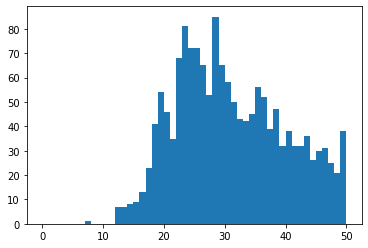

In [36]:
_plt.hist(isis, bins=_N.linspace(0, 50, 51))

In [32]:
isis

array([ 5, 11, 10, 13,  6, 20,  2,  7, 17, 36,  2, 14, 23,  6, 14, 24,  3,
        5,  6,  7,  2,  2,  5,  2, 33,  8, 11,  1, 13, 10, 10, 13, 27,  5,
        8,  1, 15,  2, 16,  4,  3, 21, 19,  3, 11,  5,  3,  1, 10, 13, 22,
        4,  9,  8, 32, 11, 10, 18, 10, 18, 12,  1, 16,  5, 14, 15,  6,  3,
       14, 19, 12, 12,  6, 16, 10, 18,  6, 16, 25, 13, 20,  1,  7, 14, 22,
       14, 14,  5, 34,  4, 13, 23, 11, 10,  6, 14, 20, 13, 20,  5,  5,  7,
        3, 12,  3, 34, 10,  3,  3,  2,  6,  2, 26, 14, 12, 28, 10, 20,  4,
        6, 25, 19,  9, 13,  5, 30, 20, 11, 12,  5,  3,  7, 25, 29,  6,  1,
       23,  3, 30, 16,  7,  2,  3,  3, 23,  9,  7, 20,  8,  6, 21,  3,  5,
       14, 11, 13, 29,  1,  2,  3, 20,  3, 11,  6,  6, 27, 23,  7, 27,  6,
       12, 10, 27, 12,  3, 12,  9,  7, 19,  2, 21, 16, 24,  7,  2,  2, 13,
        8, 13,  5,  6, 33,  4, 10, 13, 18,  6, 25, 12, 13,  1, 22, 18,  7,
        5,  1, 25, 21,  9,  9, 16,  6,  1, 14, 15,  4, 14, 10,  6,  4, 31,
       11, 14, 13, 11,  3